In [1]:
# data를 나눠주는 페이지
# 패키지 등록

import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기

dir_data = './drive/My Drive/Colab Notebooks/Pytorch_Unet/datasets'

name_label = 'train-labels.tif'
name_input = 'train-volume.tif'

img_label = Image.open(os.path.join(dir_data, name_label))
img_input = Image.open(os.path.join(dir_data, name_input))

ny, nx = img_label.size
nframe = img_label.n_frames

In [3]:
# train, val, test 3개로 나눠줌

nframe_train = 24
nframe_val = 3
nframe_test = 3

dir_save_train = os.path.join(dir_data, 'train')
dir_save_val = os.path.join(dir_data, 'val')
dir_save_test = os.path.join(dir_data, 'test')

if not os.path.exists(dir_save_train):
  os.makedirs(dir_save_train)

if not os.path.exists(dir_save_val):
  os.makedirs(dir_save_val)

if not os.path.exists(dir_save_test):
  os.makedirs(dir_save_test)

In [4]:
# nframe shuffle (random index 설정을 통해)

id_frame = np.arange(nframe)
np.random.shuffle(id_frame)

In [5]:
# train 진행할 내용

offset_nframe = 0

for i in range(nframe_train):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_train, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_train, 'input_%03d.npy' % i), input_)

In [6]:
# val 진행할 내용

offset_nframe += nframe_train

for i in range(nframe_val):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_val, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_val, 'input_%03d.npy' % i), input_)

In [7]:
# test 진행할 내용

offset_nframe += nframe_val

for i in range(nframe_test):
    img_label.seek(id_frame[i + offset_nframe])
    img_input.seek(id_frame[i + offset_nframe])

    label_ = np.asarray(img_label)
    input_ = np.asarray(img_input)

    np.save(os.path.join(dir_save_test, 'label_%03d.npy' % i), label_)
    np.save(os.path.join(dir_save_test, 'input_%03d.npy' % i), input_)

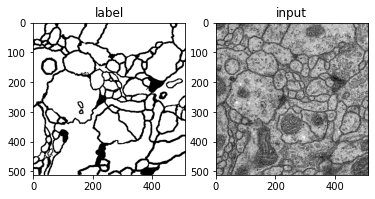

In [8]:
# matplotlib 출력

plt.subplot(121)
plt.imshow(label_, cmap='gray')
plt.title('label')

plt.subplot(122)
plt.imshow(input_, cmap='gray')
plt.title('input')

plt.show()